In this notebook, I will work on part 2 of the image stitching series. Betwen this post and the [previous post](http://learningjulia.com/2017/03/26/image-stitching-part-1.html), I go through all 5 steps of an image stitching pipeline:

1. Extracting feature points (_Part 1_)
2. Calculate descriptors (_Part 1_)
3. Match points (_Part 1_)
4. Calculate transformation (_Part 2_)
5. Stitch images (_Part 2_)

In this notebook, I'll go through Part 2: calculating a transformation and actually stitching the images together.

In [3]:
using ImageFeatures, Images, FileIO, ImageDraw;

I'll use the same two images I used in the previous post, two images of the Stata Center in Cambridge, MA.

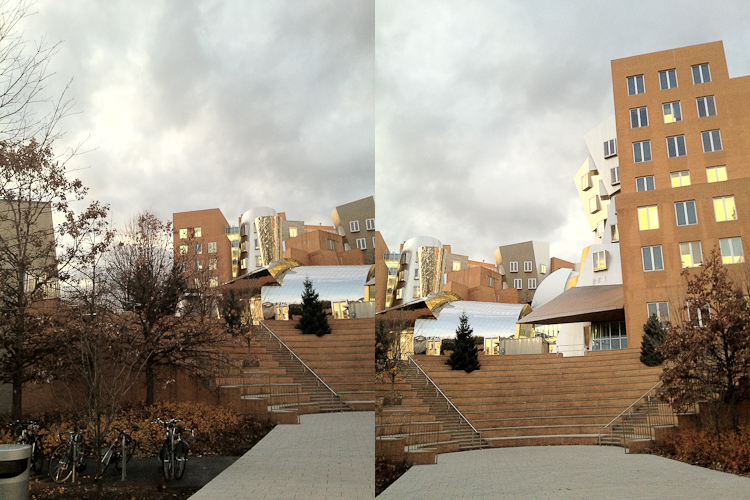

In [2]:
img1 = load("imgs/stata-1.png")
img2 = load("imgs/stata-2.png")
[img1 img2]

To recap steps 1 through 3 from the previous post, we extracted feature points, calculated feature descriptors, and matched the points together.

In [4]:
function get_descriptors(img::AbstractArray)
    brisk_params = BRISK();
    features = Features(Keypoints(imcorner(img, method=harris)));
    desc, ret_features = create_descriptor(Gray.(img), features, brisk_params);
end

function match_points(img1::AbstractArray, img2::AbstractArray, threshold::Float64=0.1)
    desc_1, ret_features_1 = get_descriptors(img1);
    desc_2, ret_features_2 = get_descriptors(img2);
    matches = match_keypoints(Keypoints(ret_features_1), Keypoints(ret_features_2), desc_1, desc_2, threshold);
    return matches;
end

function draw_matches(img1, img2, matches)
    grid = [img1 img2];
    offset = CartesianIndex(0, size(img1, 2));
    for m in matches
        line!(grid, m[1], m[2] + offset)
    end
    grid
end

draw_matches (generic function with 1 method)

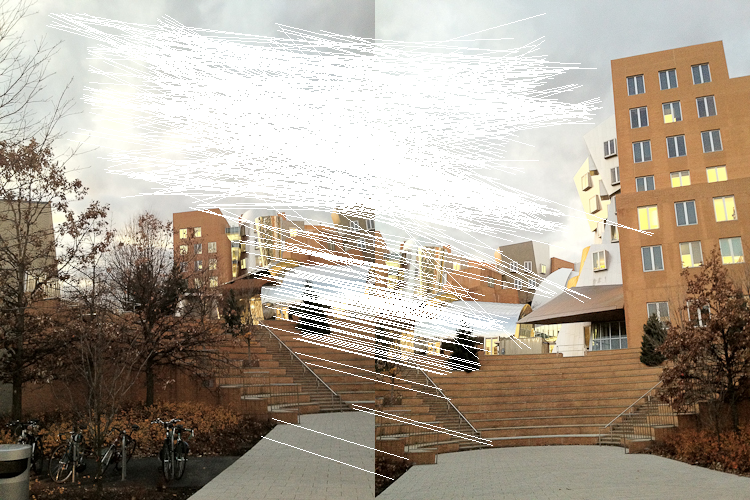

In [5]:
matches = match_points(img1, img2, 0.1);
draw_matches(img1, img2, matches)

# Calculate transformation

Now that we've computed the matches between the two images, we need to figure out the transformation between the two images, so we know how to warp the images.

# Stitch images